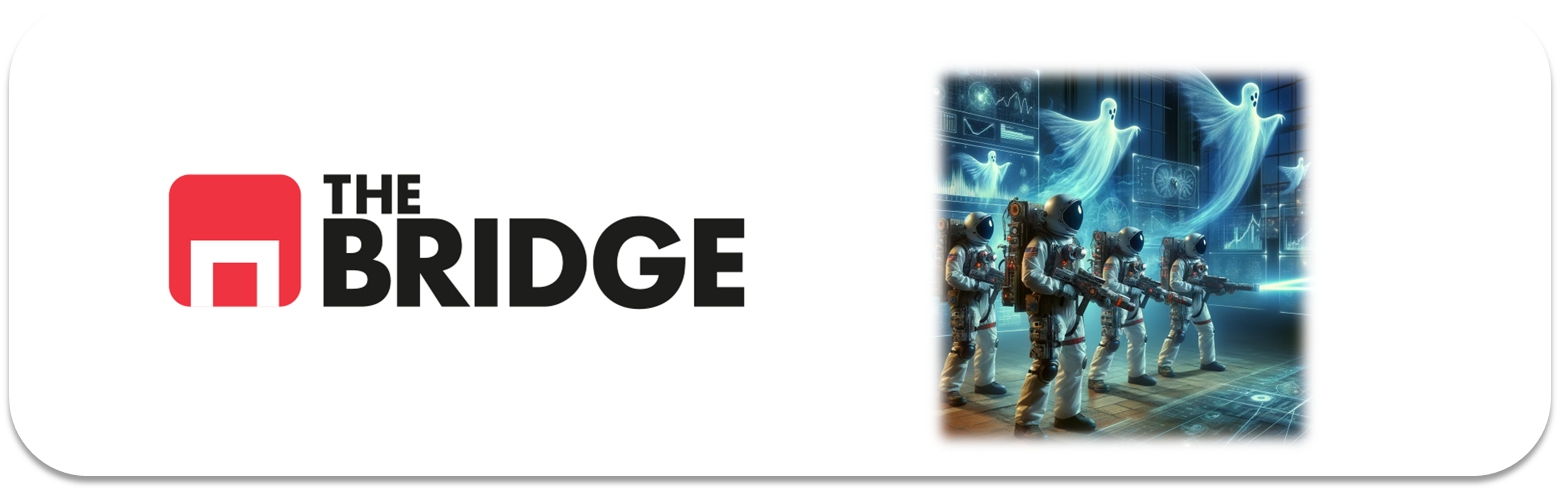

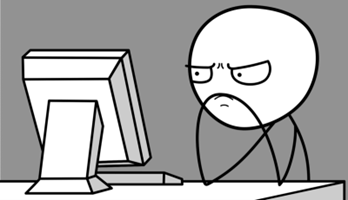

Para ejercitarte y afianzar lo aprendido sobre **Series Temporales**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### El "problema"

Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

regresión_ metrica :accuracy y mape

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [220]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import funciones_ML as bt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from pmdarima.arima import ARIMA, auto_arima
from statsmodels.tsa.arima.model import sarimax
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima
from sklearn.ensemble import RandomForestRegressor

### Ejercicio 1

Carga los datos y adecúa el dataset teniendo en cuenta que es una serie temporal. Para ello convierte la columna de fecha al formato adecuado y luego úsala como índice.

In [84]:
df=pd.read_excel(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\SPRING_17_M_L_WRAP_UP\UNIT_1\EJERCICIOS\data\AirPassengers.xlsx")

In [86]:
df.head()

,date,value
0,1960-12-01,432
1,1960-11-01,390
2,1960-10-01,461
3,1960-09-01,508
4,1960-08-01,606


In [4]:
df.date=pd.to_datetime(df['date'])


In [5]:
bt.obtener_estadisticas(df)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
date,100.0,datetime64[ns],No,1949-01-01 00:00:00,No,No,No,No,No,categorica ordinal,0.0
value,81.94,int64,280.3,No,119.97,14391.92,180.0,265.5,360.5,numerica continua,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    144 non-null    datetime64[ns]
 1   value   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


### Ejercicio 2

¿De qué fecha a qué fecha va el histórico?¿Qué periodicidad tiene la serie?

In [7]:
df.min()

date     1949-01-01 00:00:00
value                    104
dtype: object

In [8]:
df.max()

date     1960-12-01 00:00:00
value                    622
dtype: object

In [90]:
df=df.set_index('date')

In [91]:
df.head(2)

,value
date,
1960-12-01,432
1960-11-01,390


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1960-12-01 to 1949-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


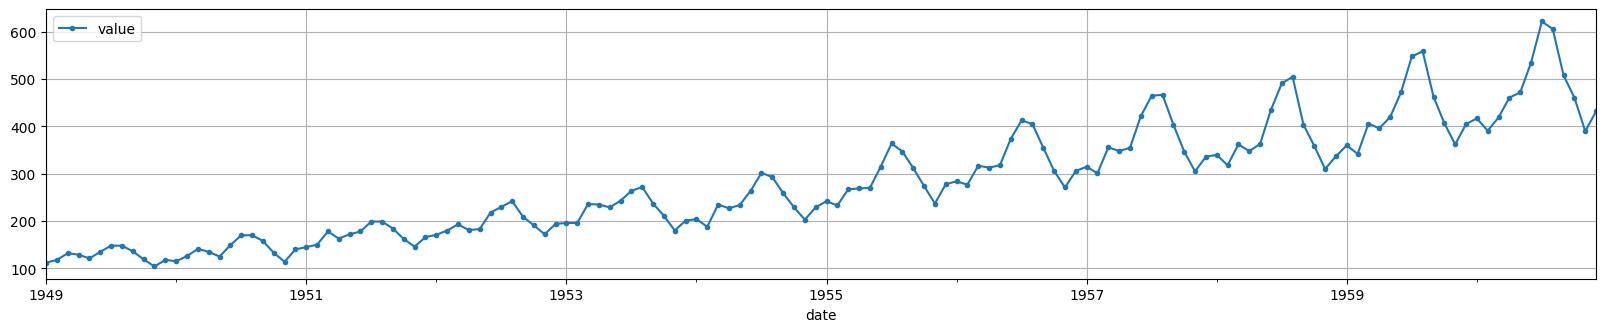

In [12]:
df.plot(grid=True, marker=".", figsize=(20, 3.5))
plt.show()

In [19]:
# presenta visualmente una periocidad anual , coan algunas subidas y bajadas pero con tendecia alcista o ascendete, con una serie de constantes subidad y bajadas poor periodo

In [122]:
#predicor naive
y_naive = df.loc["1949-01":"1960-12","value"].shift().loc["1949-01":"1960-12"]

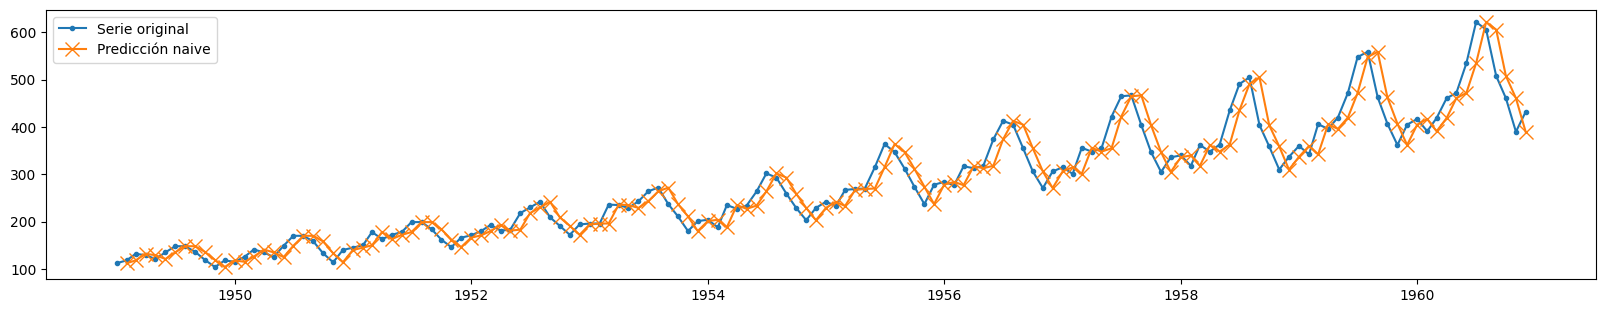

In [123]:
plt.figure(figsize=(20, 3.5))
plt.plot(df, marker=".", label="Serie original")
plt.plot(y_naive, "x-",markersize=10, label="Predicción naive")
plt.legend()
plt.show()

### Ejercicio 3

¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad? Analiza de manera gráfica, pero todavía sin descomponer la serie.

In [20]:
# comienza con pocos pasajeros en 1949,alrededir de 100, pero cada año aproximadamenbte con bainenes vas asciendiendo hast llegar al final del periodio en 1960, donde el nives de pasajeros superea los 600
# la tendecia de ascendente y la estacionalidad es anual, al menos visualmente, por lo que si esto es cierto estariamos ante un DT con estacionariedad

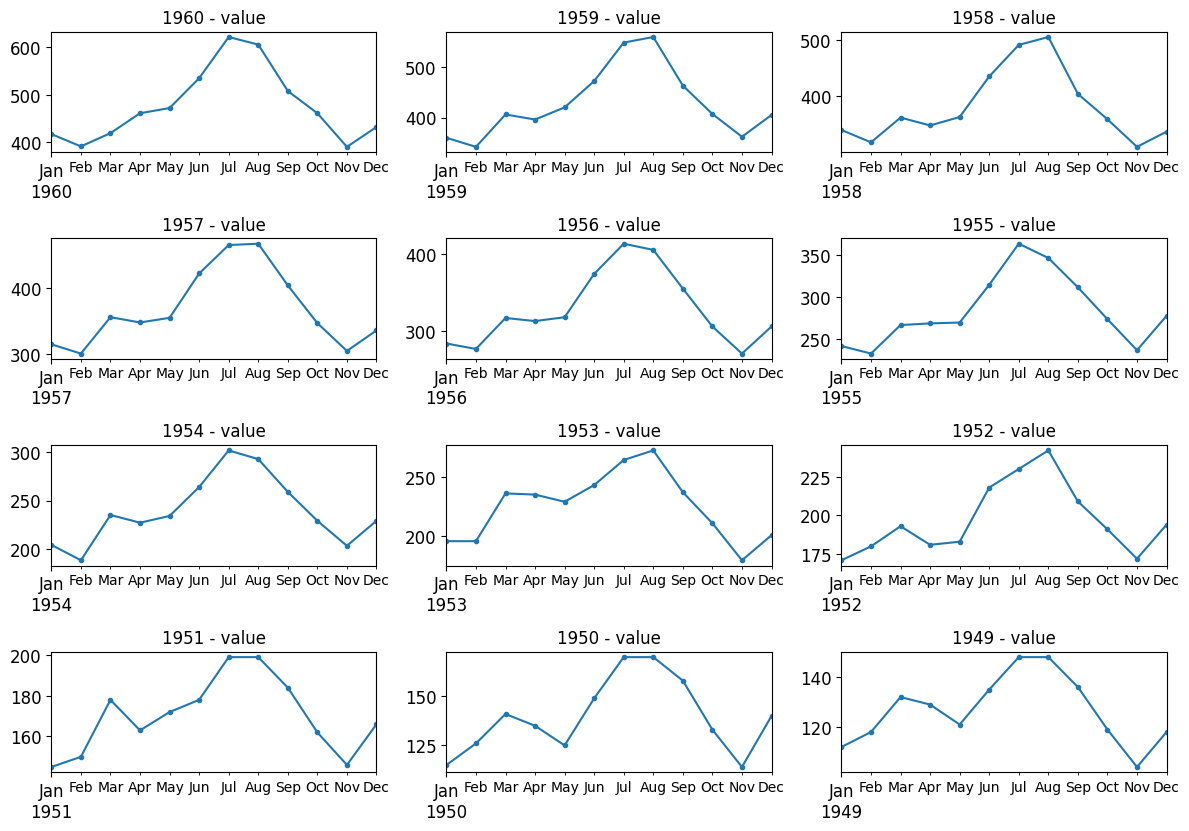

In [13]:
bt.graficar_series_temporales_anuales(df, figsize=(12, 10), fontsize=12)

In [14]:
# efectivamente y analizando las graficas anulamente, se puede decir que es estacional con tenbdencias ascdendente

In [101]:
#test aduller
test_estacionalidad= adfuller(df.values)# rechazamos la hipotsis de no estacionalidad al no estas por debajo del punto de confianza estadistica del 95%
test_estacionalidad

(0.8153688792060441,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

### Ejercicio 4

¿Podrías demostrar de dos maneras estadísticas que la serie no es estacionaria?

In [27]:
df.columns

Index(['value'], dtype='object')

<Figure size 1000x600 with 0 Axes>

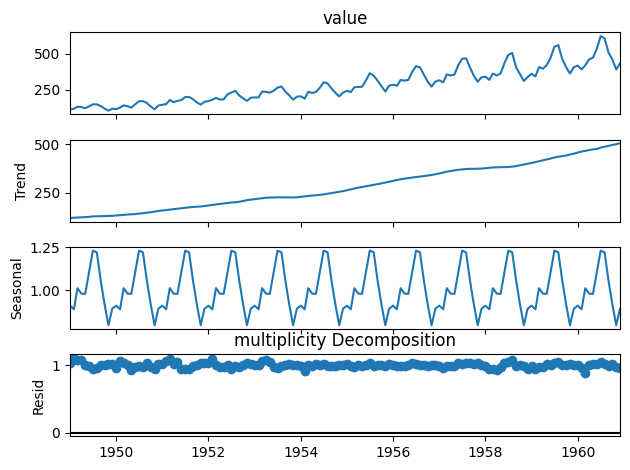

In [37]:
# las dos maneras son por le metodo multiplicativo o aditivo de los elementos que forman la serie temportal ( Tendencia, Estacionalidad, Residios y Ciclico)
df=df.sort_index()
#1 multiplicativo
des_multi= seasonal_decompose(df["1949":"1960"]['value'], model = 'multiplicative', extrapolate_trend = 'freq')

#1 aditivo
des_add = seasonal_decompose(df["1949":"1960"]['value'], model = 'additive', extrapolate_trend = 'freq')

# Plot
plt.figure(figsize=(10,6))
des_multi.plot();
plt.title("multiplicity Decomposition");


<Figure size 1000x600 with 0 Axes>

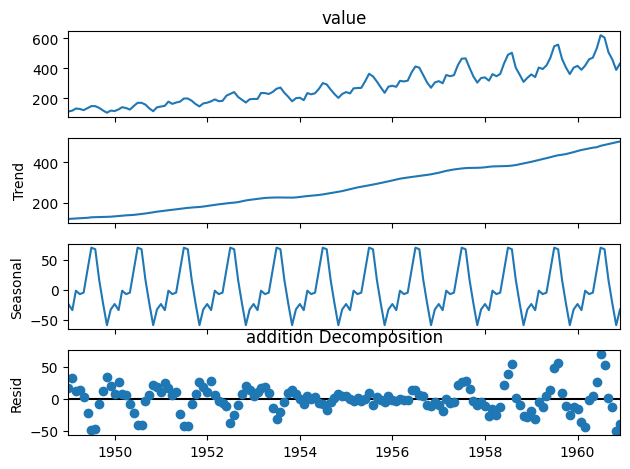

In [38]:
# Plot
plt.figure(figsize=(10,6))
des_add.plot();
plt.title("addition Decomposition");

### Ejercicio 5

Emplea la descomposición que hemos aprendido en el workout para representar gráficamente la tendencia. Si has mostrado gráficamente la tendencia en el ejercicio 3, compara ambos.

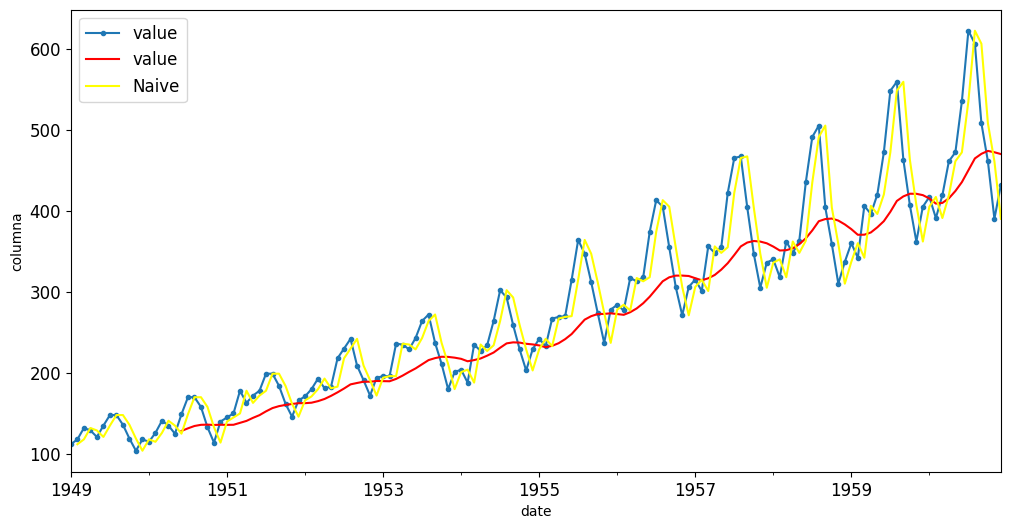

In [127]:
# la serie original y la tendencia
import matplotlib.pyplot as plot
fig, ax = plt.subplots(figsize=(12,6))
df.plot(ax=ax, label="Serie original", marker=".")
df.rolling(window=18).mean().plot(ax=ax, color="red", label="Tendencia")# usamaos una ventana mopvil con los ultimos 21 puntos de dastos  en la serie temporal
y_naive.plot(ax=ax, color="yellow", label="Naive")
# grafica
ax.set_xlabel("date")
ax.set_ylabel("columna")
ax.tick_params(labelsize=12)
ax.legend(fontsize= 12)
plt.show()

### Ejercicio 6

Visualiza todos los componentes de la serie temporal por separado

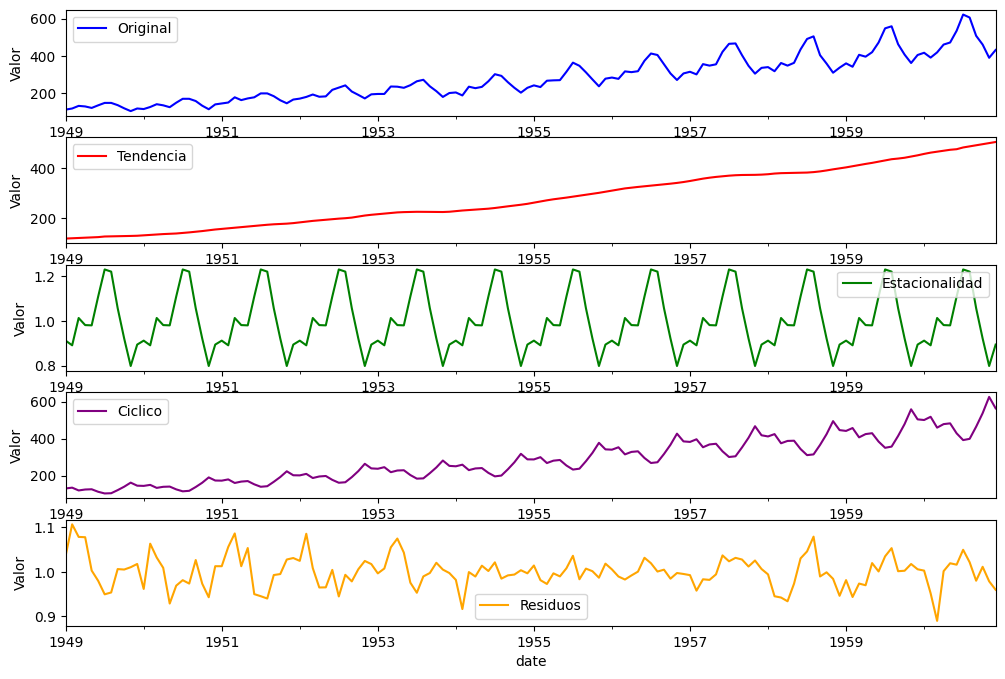

In [61]:
# los elementos que forman la serie temportal ( Tendencia, Estacionalidad, Residios y Ciclico)
df=df.sort_index()
#1
comp_serie= seasonal_decompose(df["1949":"1960"]['value'], model = 'multiplicative',extrapolate_trend = 'freq' )
cycles=comp_serie.trend/comp_serie.seasonal

#graficas
fig, axes = plt.subplots(5, 1, figsize=(12, 8))
df["1949":"1960"]["value"].plot(ax=axes[0], label="Original", color="blue")
comp_serie.trend.plot(ax=axes[1], label="Tendencia", color="red")
comp_serie.seasonal.plot(ax=axes[2], label="Estacionalidad", color="green")
cycles.plot(ax=axes[3], label="Ciclico", color="purple")
comp_serie.resid.plot(ax=axes[4], label="Residuos", color="orange")
# Ajustar la leyenda y etiquetas
for ax in axes:
    ax.legend()
    ax.set_ylabel('Valor')
plt.show()

### Ejercicio 7

Crea una matriz de correlación con los últimos 24 instantes (matriz de autocorrelación). Crea un dataframe con shift de 1 a 24 para ello, la idea es que puedas hacer una matriz de correlación con el valor actual y los 24 valores anteriores. Es decir de un mes con sus 23 meses anteriores. Interpreta la estacionalidad

<Axes: >

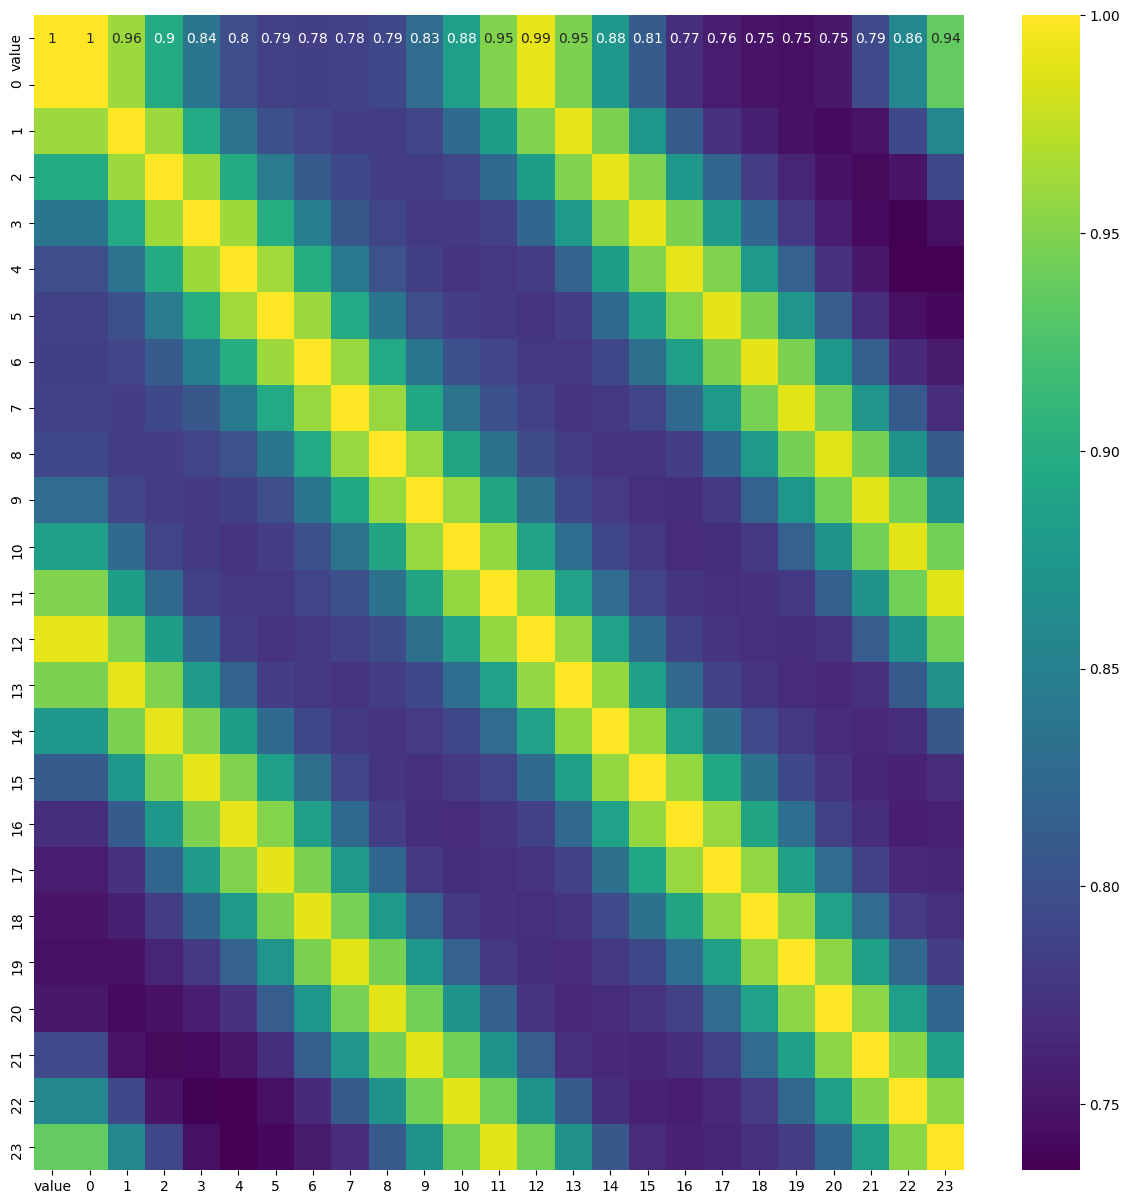

In [82]:
import pandas as pd
serie_temp= df["1949":"1960"]["value"]

df_cor=pd.DataFrame(serie_temp)
for i in range(0, 24):
    df[i]=df["value"].shift(i)# shift lo que hace es mover si es positiivo cada valor en la columna hacia abajo segun el nmumero si es 1 lo meovera 1 si es 2 lo movera 2. 
    #i es negativo hacia arriba

correla_temp=df.corr(method="pearson")
# grafico
plt.figure(figsize=(15,15))
sns.heatmap(correla_temp, annot=True, cmap="viridis")


### Ejercicio 8
Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

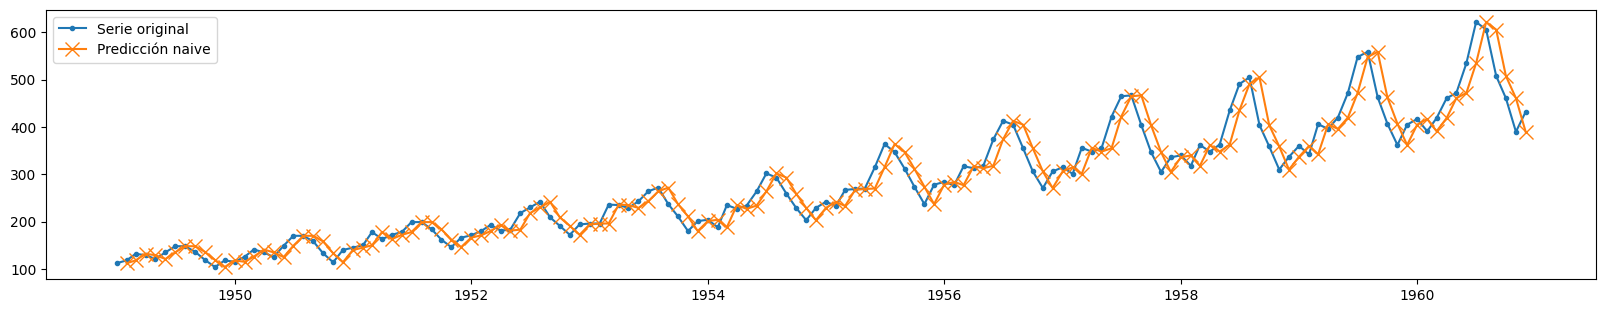

In [128]:
plt.figure(figsize=(20, 3.5))
plt.plot(df, marker=".", label="Serie original")
plt.plot(y_naive, "x-",markersize=10, label="Predicción naive")
plt.legend()
plt.show()

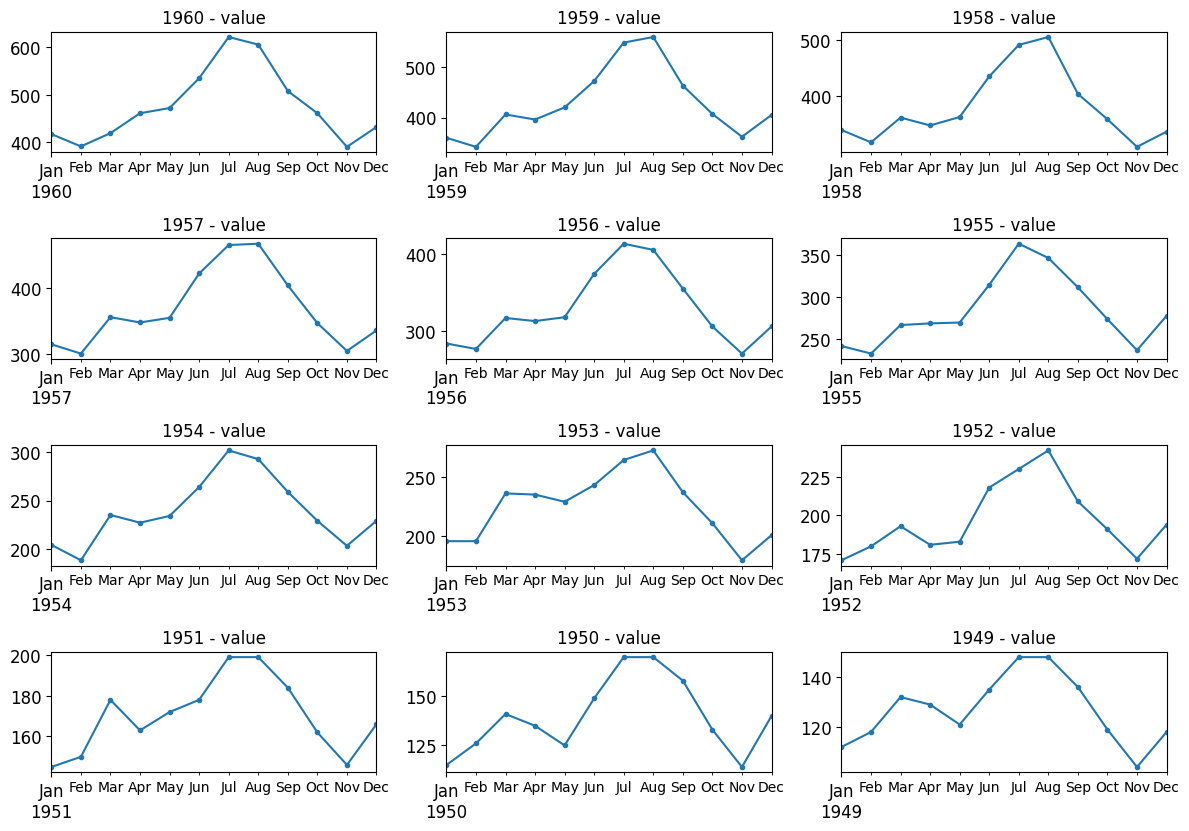

In [92]:
bt.graficar_series_temporales_anuales(df, figsize=(12, 10), fontsize=12)

In [94]:
# como se puede observar la estacionalidad se repiete cada añó comezando muya baja en enero con bajadas y sibidas hasta enero que vuelebe a caer, concretamente:
# En enero comieza a subir progresivamente motivado por algun puente que hat pot esas fechas y sobre todo preparando el vieaje de semana santa e incluso algunos los de verano, llegando el 1 pico
# hasta marzo
#1 En marzo vueve a bajar progresiovamente hasta mayo que sube a lo mas alto y se mantienen agosto, donde epoca donde el turismo y las vacaciones son propicias para adquirir billetes de avion
# y baja progresivamente de buevo hasta noviembre, subiendo nuevamente el mes de dciembre debido a las vaciones de navidad , volviendo a bajar en enero

#RESUMEN: negocio tiene que hacer mas contrataciones de perosnal en los meses de enero a marzo, y desde mayo a septiembre y finalmente para el mes de noviembre.

### Ejercicio 9

 Divide en train y test. En este caso no haremos división en validación, entre otras razones por la cantidad de datos que tenemos. Guarda 20 muestras para test.

In [177]:
df_temp=df["1949-01-01":"1960-12-31"]

In [180]:
X= df.drop(("value"), axis=1)
y= df.value

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=False)# para que no desordene la asignacion de muestras

In [215]:
y_train_p=y_train.copy()

In [197]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(124, 0)
(20, 0)
(124,)
(20,)


### Ejercicio 10

Pon en práctica lo visto en clases, crea un modelo de ARIMA (puedes utilizar autoarima), mide su RMSE y su MAPE. Comparalo gráficamente con los valores reales.

In [199]:
model = auto_arima(y_train,
                   start_p = 0,
                   start_q = 0,
                   max_p = 5,
                   max_q = 5,
                   max_d = 3,
                   seasonal=True,
                   trace= True,
                   stepwise = True) 


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1180.340, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1174.338, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1171.576, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1179.124, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1164.464, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1171.757, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1163.079, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1170.015, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1172.799, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1156.122, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1170.365, T

In [200]:
# Hacemos predicciones en el conjunto de validación
from sklearn.metrics import mean_absolute_percentage_error
y_pred = model.predict(len(X_test))

# MAPE Y RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 113.15692047231437
MAPE: 0.17150828188880785


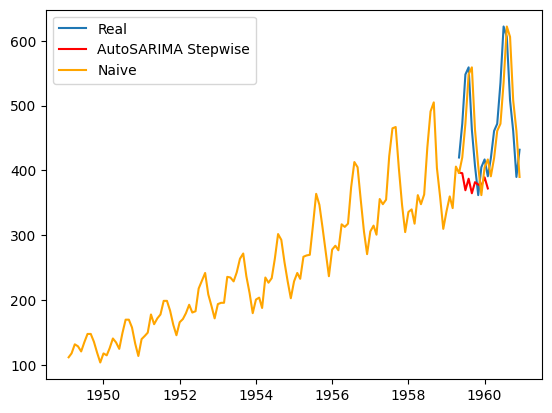

In [214]:
y_naive.sort_index(inplace=True)
y_pred = model.predict()
y_naive = df.loc["1949-01":"1960-12","value"].shift(1).loc["1949-01":"1960-12"]
plt.plot(y_test, label = "Real")
plt.plot(y_pred,color='red', label = "AutoSARIMA Stepwise")
plt.plot(y_naive, color = "orange", label ="Naive")
plt.legend()

### Ejercicio 11

Haz lo mismo que en el ejercicio 10 pero con un modelo SARIMA. ¿Cuál es mejor y por qué?

In [230]:
origin, final = "1949-01-01", "1960-12-31"
r_series = df.loc[origin:final]["value"].asfreq("M")
model = ARIMA(order=(5, 1, 3),
        seasonal_order=(0, 1, 1, 30)) # Orden: P,D,Q,s 
model = model.fit(y_train)
y_pred_x = model.predict(1)  

In [231]:
y_pred_x

1959-05-01    417.915609
Freq: MS, dtype: float64

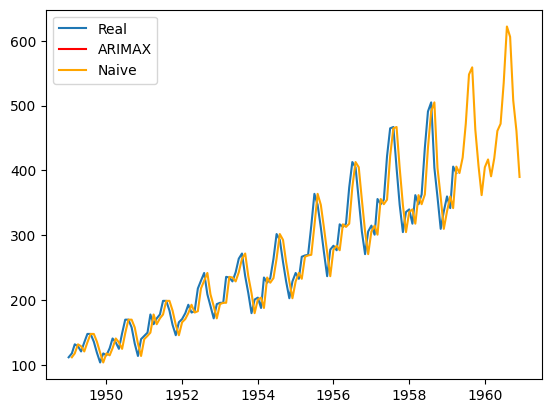

In [233]:
y_test
y_naive = df.loc["1949-01":"1960-12","value"].shift(1).loc["1949-01":"1960-12"]
plt.plot(y_train, label = "Real")
plt.plot(y_pred_x,color='red', label = "ARIMAX")
plt.plot(y_naive, color = "orange", label ="Naive")
plt.legend()